# Program 4

In [4]:
import time
import random
import heapq
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import timeit

## Heapify Benchmark

Best Case -> When the input is already a valid heap, so no elements need to be moved. This would be a sorted list.

Worst Case -> When the input array needs max amount of rearrangement to become a heap. This would be a reverse sorted list. 

In [12]:
def generate_best_case_input(n):
    """
    Returns a sorted list with n elements
    """
    elements = []
    for i in range(n):
        elements.append(i)
    elements = generate_random_case_input(n)
    heapq.heapify(elements)
    return elements

In [13]:
def generate_worst_case_input(n):
    """
    Returns a reverse sorted list with n elements
    """
    elements = []
    for i in range(n, -1, -1):
        elements.append(i)
    return elements

In [14]:
def generate_random_case_input(n):
    """
    Generates a random list of n elements
    """
    elements = []
    for i in range(n):
        rand_value = random.randint(0,100)
        elements.append(rand_value)
    return elements

In [15]:
def benchmark_heapify(elements):
    """
    Returns the runtime of the heapify algorithm for the elements passed in
    """
    start = time.perf_counter()
    heapq.heapify(elements)
    end = time.perf_counter()
    return end - start

In [16]:
def calculate_run_times_heapify(num_elements, type):
    """
    Returns a list of run times for every element passed in the num_elements list
    Type: best / worst / random case
    """

    generate_input = generate_best_case_input
    if type == "worst":
        generate_input = generate_worst_case_input
    if type == "random":
        generate_input = generate_random_case_input


    run_times = []
    for n in num_elements:
        input = generate_input(n)
        run_times.append(benchmark_heapify(input))

    return run_times

In [17]:
elements_to_test = [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
heapify_best_case = calculate_run_times_heapify(elements_to_test, "best")
heapify_worst_case = calculate_run_times_heapify(elements_to_test, "worst")
heapify_random_case = calculate_run_times_heapify(elements_to_test, "random")

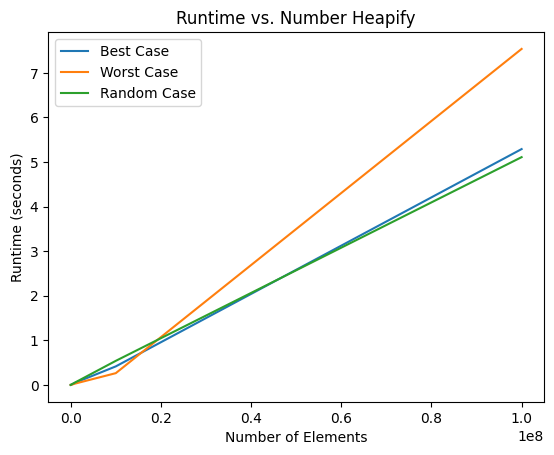

In [18]:
plt.plot(elements_to_test, heapify_best_case, label="Best Case")
plt.plot(elements_to_test, heapify_worst_case, label="Worst Case")
plt.plot(elements_to_test, heapify_random_case, label="Random Case")
plt.xlabel('Number of Elements')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs. Number Heapify')
plt.legend()
plt.show()

In [21]:
def calculate_slope(list_sizes, run_times):
    """
    Takes in a list of elements as well as the run times associated with those elements
    and returns the slope using linregress
    """

    m, b, _, _, _ = linregress(np.log(list_sizes), np.log(run_times))
    return m

In [22]:
print(f'Best Case Slope: {calculate_slope(elements_to_test, heapify_best_case)}')
print(f'Random Case Slope: {calculate_slope(elements_to_test, heapify_random_case)}')
print(f'Worst Case Slope: {calculate_slope(elements_to_test, heapify_worst_case)}')

Best Case Slope: 0.9367320816512402
Random Case Slope: 0.9048749229597391
Worst Case Slope: 0.9441626515303999


## Heappush Benchmark

In [18]:
# Function to push elements greater than everything on the heap
def push_greater(heap):
    heapq.heappush(heap, len(heap))

# Function to push elements smaller than everything on the heap
def push_smaller(heap):
    heapq.heappush(heap, -1)

# Function to push random elements on the heap
def push_random(heap, x):
    heapq.heappush(heap, x)

In [19]:
sizes = [10, 100, 1000, 10_000, 100_000, 1_000_000, 10_000_000]  # Different sizes of heaps to test
times_greater = []
times_smaller = []
times_random = []

# Measure time taken for each size of heap
for size in sizes:
    heap_greater = []
    time_greater = timeit.timeit(lambda: push_greater(heap_greater), number=size)
    times_greater.append(time_greater)

    heap_smaller = []
    time_smaller = timeit.timeit(lambda: push_smaller(heap_smaller), number=size)
    times_smaller.append(time_smaller)
    
    heap_random = []
    time_random = timeit.timeit(lambda: push_random(heap_random, random.randint(0, 100)), number=size)
    times_random.append(time_random)
    
times_greater = seconds_to_microseconds(times_greater)
times_smaller = seconds_to_microseconds(times_smaller)
times_random = seconds_to_microseconds(times_random)

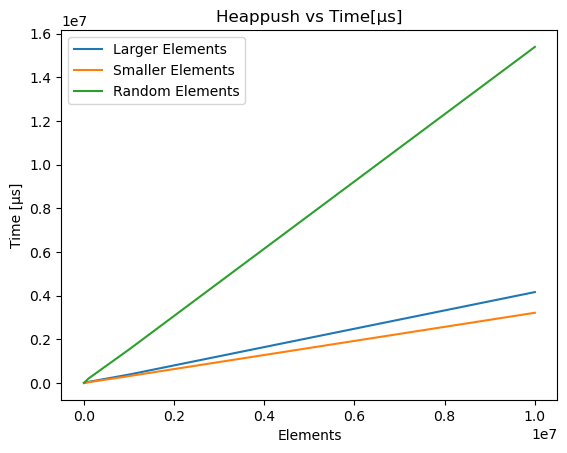

In [23]:
# Plot the results
plt.plot(sizes, times_greater, label='Larger Elements')
plt.plot(sizes, times_smaller, label='Smaller Elements')
plt.plot(sizes, times_random, label='Random Elements')
plt.xlabel('Elements')
plt.ylabel('Time [μs]')
plt.title('Heappush vs Time[μs]')
plt.legend()
plt.show()

In [21]:
print(times_smaller)
print(times_greater)
print(times_random)

[10.90002479031682, 50.50003528594971, 335.7999958097935, 3768.3999980799854, 30636.100040283054, 312712.9999920726, 3212066.199979745]
[16.300007700920105, 58.40003723278642, 430.20001612603664, 4796.299966983497, 47283.299965783954, 383177.49998532236, 4159638.6000164784]
[39.300008211284876, 186.89996795728803, 1615.1000163517892, 18611.89998453483, 199475.99997976795, 1530481.5999697894, 15385974.499979056]


In [22]:
print("Heappush best slope: " + str(linregress(np.log(sizes),
 np.log(times_smaller))[0]))
print("Heappush worst slope: " + str(linregress(np.log(sizes),
 np.log(times_greater))[0]))
print("Heappush random slope: " + str(linregress(np.log(sizes),
 np.log(times_random))[0]))

Heappush best slope: 0.926854725235996
Heappush worst slope: 0.9248433742132006
Heappush random slope: 0.9534402179482038


## Heappop Benchmark

In [24]:
def benchmark_heappop(heap_size):
    # Create a heap with random elements
    heap = [random.randint(0, heap_size*10) for _ in range(heap_size)]
    heapq.heapify(heap)
    
    def heappop_wrapper():
        # Ensure heap has at least one element
        if heap:
            heapq.heappop(heap)
    
    # Benchmark heappop
    return timeit.timeit(heappop_wrapper, number=1000)

In [25]:
def seconds_to_microseconds(seconds_array):
    microseconds_array = [sec * 1_000_000 for sec in seconds_array]
    return microseconds_array

In [26]:
# Define different heap sizes for benchmarking
heap_sizes = [10, 100, 1000, 10_000, 100_000, 1_000_000, 10_000_000]

# Perform benchmarking
times = [benchmark_heappop(size) for size in heap_sizes]

times = seconds_to_microseconds(times)

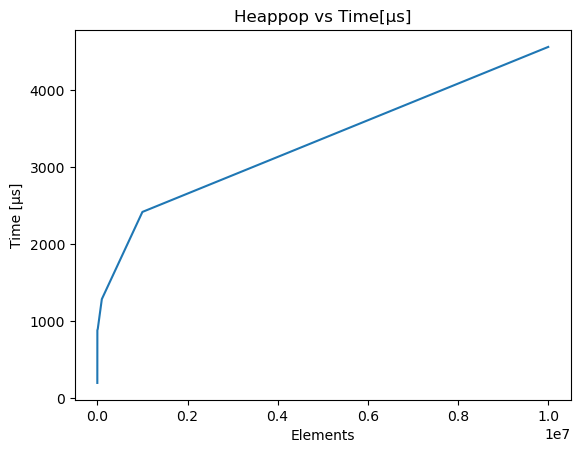

In [27]:
# Plot the results
plt.plot(heap_sizes, times)
plt.title('Heappop vs Time[μs]')
plt.xlabel('Elements')
plt.ylabel('Time [μs]')
plt.show()

In [15]:
print("Elements tested: " + str(heap_sizes))
print("Time: " + str(times))

Elements tested: [10, 100, 1000, 10000, 100000, 1000000, 10000000]
Time: [147.30001566931605, 192.0000067912042, 691.2000244483352, 897.0000199042261, 1431.2000130303204, 2832.300029695034, 3467.200032901019]


In [17]:
print("Heappop slope: " + str(linregress(np.log(heap_sizes),
 np.log(times))[0]))

Heappop slope: 0.24175360455460873


## Heapreplace Benchmark